<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML_MeanShift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mean Shift

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import MeanShift
from sklearn import preprocessing
# from sklearn.model_selection import train_test_split

##Titanic dataset

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* pclass - passenger class (1, 2, 3)
* survival - survival (0 = no, 1 = yes)
*   sibsp - number of siblings/spouses aboard
*   parch - number of parents/children aborad
* ticket - ticket number
* fare - passenger fare (british pounds)
* cabin
* embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* boat - lifeboat
* body - body identification number
* home.dest - home/destination

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Projekty Machine Learning/ML_KMeans/titanic.xls')
original_df = pd.DataFrame.copy(df)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##Data preprocessing

In [ ]:
df.drop(['body', 'name'], axis = 1, inplace = True)

###Handling categorical data

In [ ]:
df.apply(pd.to_numeric, errors='ignore')
df.fillna(0, inplace = True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
import pickle

columns = df.columns.values

for column in columns:
  if df[column].dtype != np.int64 and df[column].dtype != np.float64:
    le = LabelEncoder()
    df[column] = df[column].astype('string')
    df[column] = le.fit_transform(df[column])

    filehandler = open(f'/content/drive/MyDrive/Projekty Machine Learning/ML_KMeans/{df[column].name}.obj','wb')
    pickle.dump(le, filehandler)
    filehandler.close()

    df[column] = le.fit_transform(df[column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   int64  
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   ticket     1309 non-null   int64  
 7   fare       1309 non-null   float64
 8   cabin      1309 non-null   int64  
 9   embarked   1309 non-null   int64  
 10  boat       1309 non-null   int64  
 11  home.dest  1309 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 122.8 KB


###Reversal of mapping

In [ ]:
# file = open('/content/drive/MyDrive/Projekty Machine Learning/ML_KMeans/sex.obj','rb')
# le_loaded = pickle.load(file)
# file.close()

# # df['sex'] = le_loaded.inverse_transform(df['sex'])
# # df.head()

##Feeding MeanShift algorithm with data

In [ ]:
X = np.array(df.drop(['survived'], axis = 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

In [ ]:
clf = MeanShift()
clf.fit(X)

MeanShift()

In [ ]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

original_df['cluster_group'] = np.nan

for i, label in enumerate(labels):
        original_df['cluster_group'].iloc[i] = label

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}

for i in range(n_clusters_):
  temp_df = original_df[(original_df['cluster_group'] == float(i))] #new dataframes which contain data for particular clusters
  survival_cluster = temp_df[(temp_df['survived'] == 1)]
  survival_rate = len(survival_cluster) / len(temp_df)
  survival_rates[i] = survival_rate
print(survival_rates)

{0: 0.38072289156626504, 1: 0.0, 2: 1.0, 3: 0.0, 4: 0.5}


###A close look at the groups

In [ ]:
print(original_df[(original_df['cluster_group'] == 0)].describe())

            pclass     survived         age        sibsp        parch  \
count  1245.000000  1245.000000  992.000000  1245.000000  1245.000000   
mean      2.319679     0.380723   29.682628     0.406426     0.287550   
std       0.822106     0.485760   14.204869     0.764121     0.637177   
min       1.000000     0.000000    0.166700     0.000000     0.000000   
25%       2.000000     0.000000   21.000000     0.000000     0.000000   
50%       3.000000     0.000000   28.000000     0.000000     0.000000   
75%       3.000000     1.000000   38.000000     1.000000     0.000000   
max       3.000000     1.000000   80.000000     4.000000     4.000000   

              fare        body  cluster_group  
count  1244.000000  115.000000         1245.0  
mean     26.303359  161.469565            0.0  
std      31.916500   98.326642            0.0  
min       0.000000    1.000000            0.0  
25%       7.895800   71.000000            0.0  
50%      13.416700  165.000000            0.0  
75%   

##A demo of the mean-shift clustering algorithm

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

###Generating sample data

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

###Computing clustering

In [ ]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


###Plot result

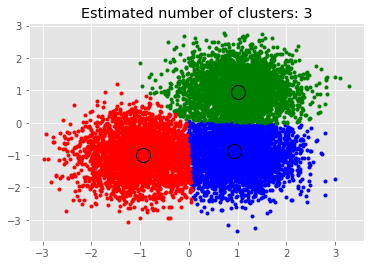

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

##Mean Shift from scratch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11],
              [8, 2],
              [10, 2],
              [9, 3]])

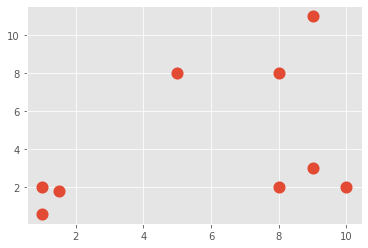

In [ ]:
plt.scatter(X[:,0], X[:,1], s = 50, linewidths = 5) #All rows from first col, all rows from 2nd col
plt.show()

In [89]:
colors = 10 * ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

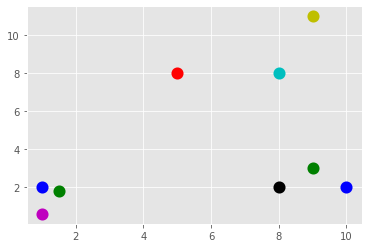

In [ ]:
for point in range(len(X)):
  # print (point, X[point])
  plt.scatter(X[point][0], X[point][1], color = colors[point], s = 50, linewidths = 5)

plt.show()

###Creating a new class

In [137]:
class Mean_Shift:
  def __init__(self, radius = None, radius_norm_step = 100):
    self.radius = radius
    self.radius_norm_step = radius_norm_step

  def fit(self, data):
    if self.radius == None:
      all_data_centroid = np.average(data, axis = 0)
      all_data_norm = np.linalg.norm(all_data_centroid)
      self.radius = all_data_norm / self.radius_norm_step

    centroids = {}

    for i in range(len(data)):
      centroids[i] = data[i] #Number of centroids is equal to number of datapoints

    weights = [i for i in range(self.radius_norm_step)][::-1] #reversed list of 0 to 99

    while True:
      new_centroids = []
      for i in centroids:
        in_bandwidth = []
        centroid = centroids[i]
        
        for featureset in data:
          distance = np.linalg.norm(featureset - centroid)
          if distance == 0:
            distance = 0.00000001
          weight_index = int(distance / self.radius)
          if weight_index > self.radius_norm_step - 1:
            weight_index = self.radius_norm_step - 1
          
          to_add = (weights[weight_index]**2)*[featureset]
          in_bandwidth += to_add

          # if np.linalg.norm(featureset - centroid) < self.radius:
          #   in_bandwidth.append(featureset)
        
        new_centroid = np.average(in_bandwidth, axis = 0)
        new_centroids.append(tuple(new_centroid)) #converting an array to the tuple!
      
      uniques = sorted(list(set(new_centroids))) #Set of tuples from above ^

      to_pop = []

      # for i in uniques:
      #   for ii in uniques:
      #     if i == ii:
      #       pass #pass if identical
      #     elif np.linalg.norm(np.array(i) - np.array(ii)) <= self.radius:
      #       to_pop.append(ii)
      #       break

      # for i in to_pop:
      #   try:
      #     uniques.remove(i)
      #   except:
      #     pass

      for i in uniques:
        if i in to_pop: pass # we're not inspecting centroids in radius of i since i will be popped
        for ii in uniques:
          if i == ii:
            pass
          elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius and ii not in to_pop: # skipping already-added centroids
            to_pop.append(ii)

      for i in to_pop:
        uniques.remove(i)

      prev_centroids = dict(centroids)

      centroids = {}

      for i in range(len(uniques)):
        centroids[i] = np.array(uniques[i])

      optimized = True

      for i in centroids:
        if not np.array_equal(centroids[i], prev_centroids[i]): #comparing two arrays
          optimized = False
        
        if not optimized:
          break
      
      if optimized:
        break

    self.centroids = centroids

    self.classifications = {}
    
    for i in range(len(self.centroids)):
      self.classifications[i] = []

    for featureset in data:
      distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
      classification = distances.index(min(distances))
      self.classifications[classification].append(featureset)
  
  def predict(self, data):
    distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
    classification = distances.index(min(distances))
    return classification

In [138]:
clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

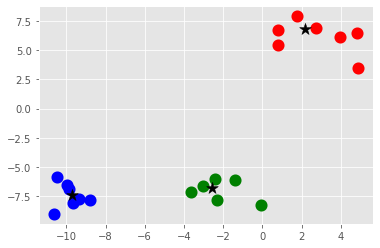

In [139]:
for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker = 'o', color = color, s = 50, linewidths = 5)

for c in centroids:
  plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker = '*', s = 150)

plt.show()

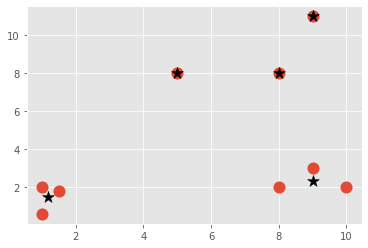

In [ ]:
clf = Mean_Shift(radius = 2)
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s = 50, linewidths = 5)
for c in centroids:
  plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker = '*', s = 150)
plt.show()

####Comparison with sklearn's MeanShift

number of estimated clusters : 3


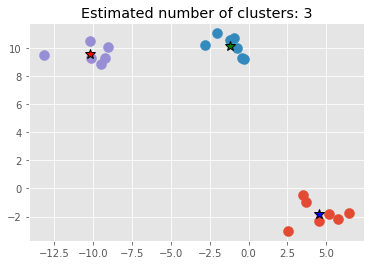

In [150]:
ms = MeanShift(bandwidth=4, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 100)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "*",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=10,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

###Blobs

In [141]:
# X, y
X, _ = make_blobs(n_samples = 20, centers = 3, n_features = 2)

In [142]:
clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

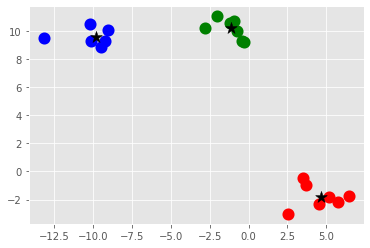

In [143]:
for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker = 'o', color = color, s = 50, linewidths = 5)

for c in centroids:
  plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker = '*', s = 150)

plt.show()